In [ ]:
#Begin!

# Masters' in Applied Artificial Intelligence
## Machine Learning Algorithms Course

Notebooks for the MLA course

by [*lufer*](mailto:lufer@ipca.pt)

(ver 3.0 - 2025-2026)

---



# ML Modelling - Pipelines
\
**Contents**:

1.  **Machine Learning Pipeline**



This notebook explores the automatization of ML models creatiation, testing and improvement.

## What is ML Pipeline?


> "(…) is a series of interconnected data processing and modelling steps designed to automate, standardize and streamline the process of building, training, evaluating and deploying machine learning models (…)"
(IBM)


**Pipeline process:**

1. Data retrieval and ingestion
2. Data preparation
3. Model training
4. Model evaluation and tuning
5. Model deployment
6. Monitoring

Pipeline allows to apply sequentially a list of transformers to preprocess the data and, if desired, conclude the sequence with a final predictor for predictive modeling.

Intermediate steps of the pipeline must be `transforms`, that is, they must implement `fit` and `transform` methods. The final estimator only needs to implement `fit`. The transformers in the pipeline can be cached using memory argument.

[see more on...](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)


## Environment preparation


**Importing necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#import libraries for trainning
from sklearn.model_selection import train_test_split


In [ ]:
import datetime
print(f"Last updated: {datetime.datetime.now()}")

**Mounting Drive**

In [3]:

from google.colab import drive

# it will ask for your google drive credentiaals
drive.mount('/content/gDrive/', force_remount=True)

Mounted at /content/gDrive/


## 1- Using a Dummy dataset

Lets create a dummy classification dataset. `make_classification` alows that!


```
sklearn.datasets.make_classification(
  n_samples=100,
  n_features=20, *,
  n_informative=2,
  n_redundant=2,
  n_repeated=0,
  n_classes=2,
  n_clusters_per_class=2,
  weights=None,
  flip_y=0.01,
  class_sep=1.0,
  hypercube=True,
  shift=0.0,
  scale=1.0,
  shuffle=True,
  random_state=None
)
```



This generated classification dataset has 100.000 samples and 20 features. Of the 20 features, only 2 are informative, 2 are redundant (random combinations of the informative features) and the remaining 16 are uninformative (random numbers)

In [4]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
#10000 examples (i.e., samples)
#10 features (both of them informative features, 0 redundant)
#1 cluster per class
#mild class separation
#two informative features

X, y = make_classification(
    n_samples=10000, n_features=10, n_informative=2, n_redundant=2, random_state=42, n_clusters_per_class=1
)

train_samples = 100  # Samples used for training the models
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    shuffle=False,
    test_size=10000 - train_samples,
)
#We have data!

**Check dataset insights:**

In [5]:
X.shape, y.shape

((10000, 10), (10000,))

In [6]:
X

array([[-1.58346875,  1.36377949,  1.85677315, ..., -2.25435767,
         0.25211767, -0.29003854],
       [-1.81030538,  1.09647866,  1.46821156, ...,  0.79752011,
         0.03003642,  0.10543112],
       [-0.23420927,  0.026664  ,  0.02698245, ...,  1.67520242,
        -0.0603995 , -1.89181054],
       ...,
       [ 1.25943595,  0.54645121,  0.83083661, ...,  1.4051017 ,
         0.70976424,  0.30147766],
       [-0.11212538, -0.21233076, -0.30553328, ...,  0.97498443,
        -0.15453379, -1.31089144],
       [ 1.29235754,  1.46355804,  2.12980871, ...,  0.05554024,
         1.23215111, -0.86852369]])

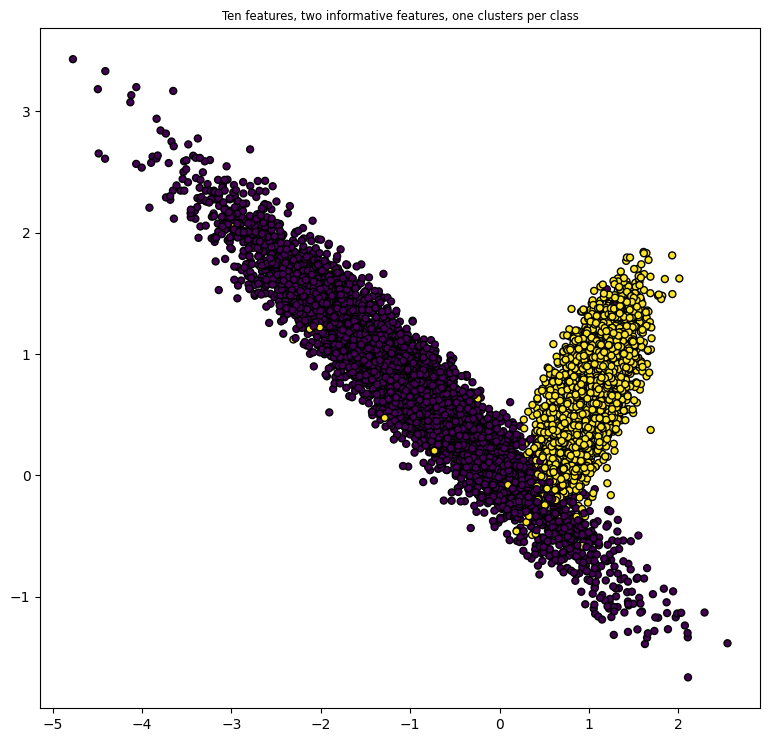

In [7]:
plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)
plt.subplot(111)
plt.title("Ten features, two informative features, one clusters per class", fontsize="small")
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")
plt.show()

**Another example of `make_classification`**

<Axes: >

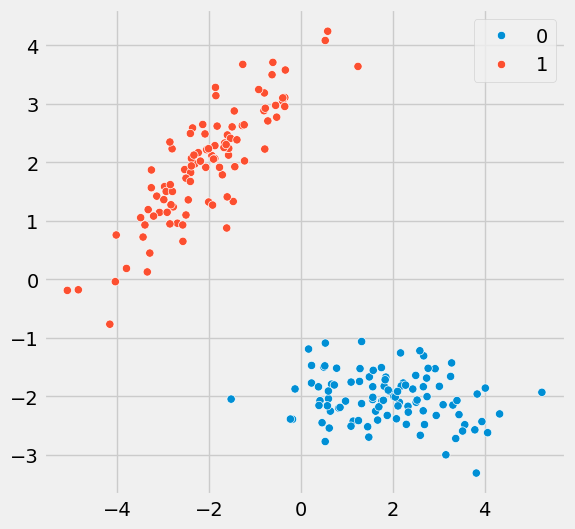

In [9]:
#just for understanding better!
X1, y1 = make_classification(n_samples = 200
                           ,n_features = 2
                           ,n_informative = 2
                           ,n_redundant = 0
                           ,n_clusters_per_class = 1
                           ,flip_y = 0
                           ,class_sep = 2
                           ,random_state = 7
                           )
plt.style.use('fivethirtyeight')
plt.figure(figsize = (6,6))
sns.scatterplot(x = X1[:,0], y = X1[:,1], hue = y1)

Lets continue with the Pipeline!

In [10]:
#Exploring Support Vector Classification model
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

model = SVC()
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)
# An estimator's parameter can be set using '__' syntax
# "svc__C=10" means set 10 to parameter "C" of SVC model
# set parameter, train and evaluate
pipe.set_params(svc__C=10).fit(X_train, y_train).score(X_test, y_test)

0.9477777777777778

## 2 - Using an existing Dataset

### 2.1 - Download Dataset

In [11]:
filePath="/content/gDrive/MyDrive/Colab Notebooks/MIAA - ML - 2025-2026/Datasets/"
data = pd.read_csv(filePath+"heart-disease.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### 2.2 - Dataset insights and Preparation

[Adapted from...](https://www.kaggle.com/code/gunjanvermaa/prediction-model-pipeline-heart-disease/notebook)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [13]:
data.isna().sum()
#There are NaN values! No!

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [14]:
data.describe()
#there is no Categorical features!

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
data.shape

(1025, 14)

In [16]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Look about features (cor)relations:

The pandas [crosstab](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html) function builds a cross-tabulation table that can show the frequency with which certain groups of data appear.


In [17]:
pd.crosstab(data.target, data.sex)

sex,0,1
target,,
0,86,413
1,226,300


**Relation between Heart Disease and the person' Sex:**

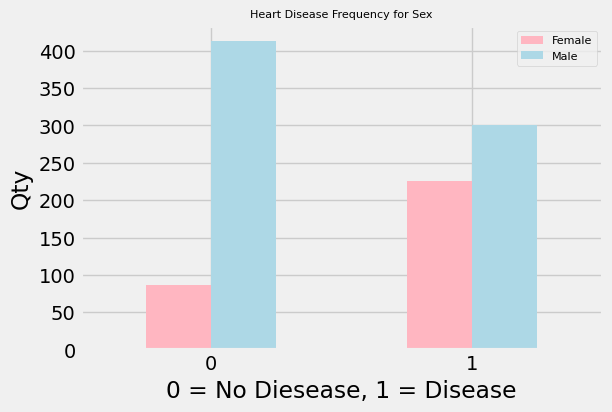

In [18]:
# Create a plot of this crosstab
ct=pd.crosstab(data.target, data.sex)
ct.plot(kind="bar",
        figsize=(6, 4),
        color=["lightpink", "lightblue"])

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Qty")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);


**Relation between Heart Disease and the person' Age:**

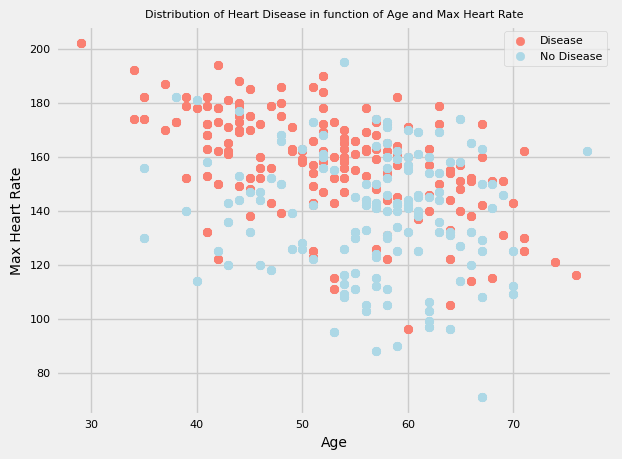

In [19]:
plt.scatter(data.age[data.target==1],data.thalach[data.target==1],c="salmon")
plt.scatter(data.age[data.target==0],data.thalach[data.target==0],c="lightblue")

plt.title("Distribution of Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

**Relation between Heart Disease and the person' Sex:**

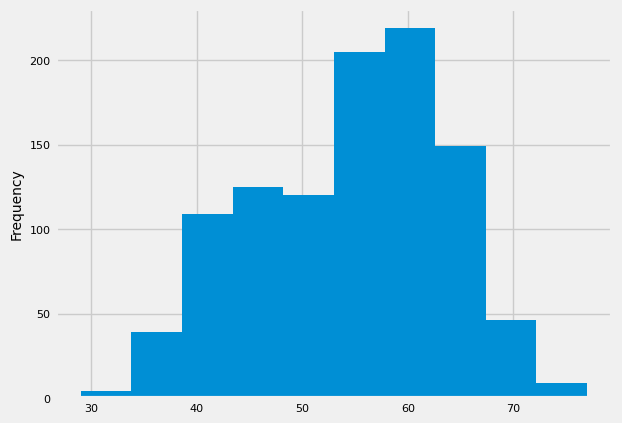

In [20]:
data.age.plot.hist();


**Heart Disease Frequency per Chest Pain Type**

- cp - chest pain type:
> 0: **Typical angina**: chest pain related decrease blood supply to the heart.
>
> 1: **Atypical angina**: chest pain not related to heart.
>
> 2: **Non-anginal pain**: typically esophageal spasms (non heart related).
>
> 3: **Asymptomatic**: chest pain not showing signs of disease.

In [21]:
ct=pd.crosstab(data.cp, data.target)
ct

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


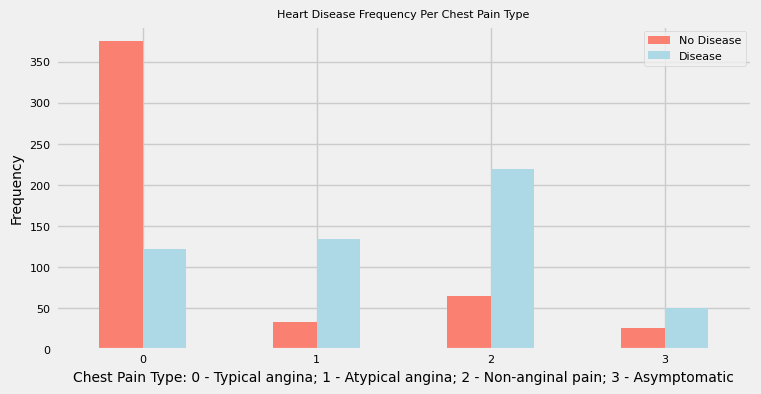

In [22]:
ct.plot(kind="bar",
        figsize=(8,4),
        color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type: 0 - Typical angina; 1 - Atypical angina; 2 - Non-anginal pain; 3 - Asymptomatic")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

**Check Correlations:**

In [23]:
cm=data.corr()
cm

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


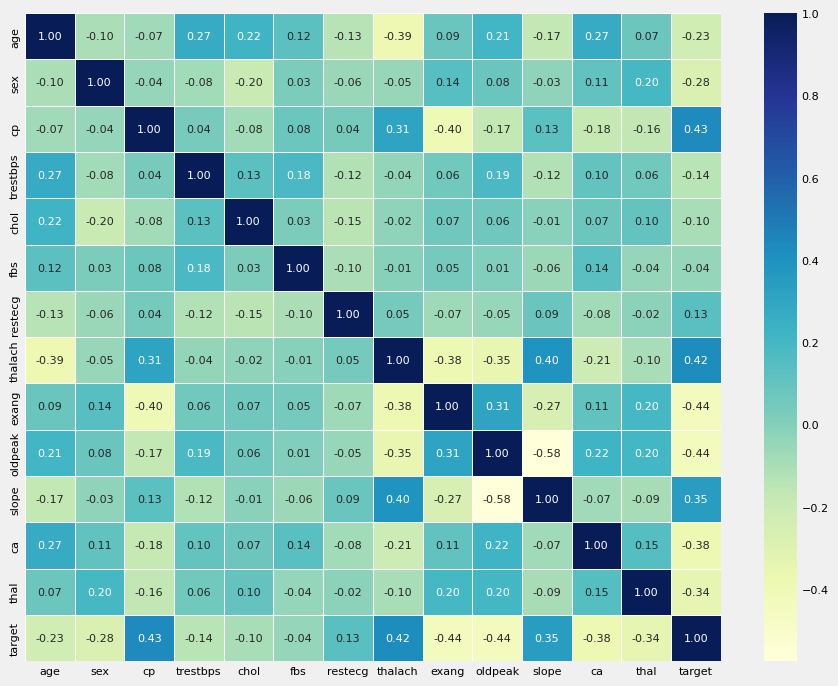

In [24]:
#Graphically

fig, ax= plt.subplots(figsize=(10,8))

ax= sns.heatmap(cm, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")

### 2.3 - Modeling

In [25]:
#Define X and y
X=data.drop("target", axis=1)
y=data.target

In [26]:
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

Lets explore three different models:
- LogisticRegression
- KNeighborsClassifier
- RandomForestClassifier


In [29]:
# Import models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
       # Fit the model to the data
       model.fit(X_train, y_train)
       # Evaluate the model and append its score to model_scores
       model_scores[name] = model.score(X_test, y_test)
    return model_scores



In [30]:
#res = list(models.keys())[0]
#analyse all models
scores = fit_and_score(models,X_train,X_test,y_train,y_test)
scores


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7804878048780488,
 'KNN': 0.7317073170731707,
 'Random Forest': 0.9853658536585366}

### 2.4 - Model Comparison

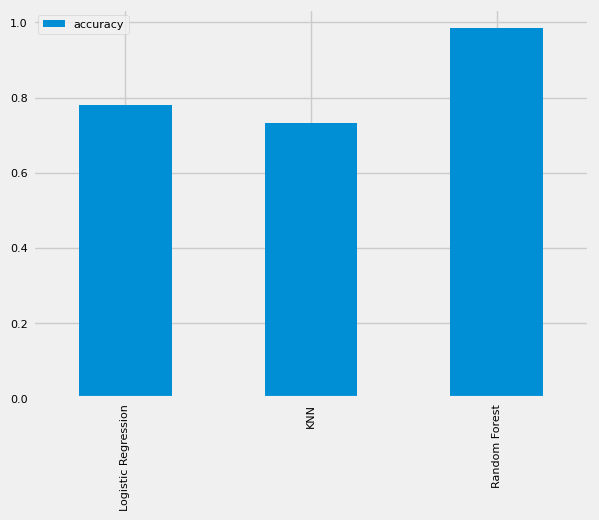

In [31]:
model_compare = pd.DataFrame(scores, index=["accuracy"])
model_compare.T.plot.bar();

### 2.5 - Hyperparameter tuning

**2.5.1 - by hand**

Explore KNN model:

Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data.

[See more aboout KNN in...](https://scikit-learn.org/stable/modules/neighbors.html#neighbors)

In [32]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors (10 values)
neighbors = range(1, 10)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))

    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))


Compare the results:

Maximum KNN score on the test data: 98.54%


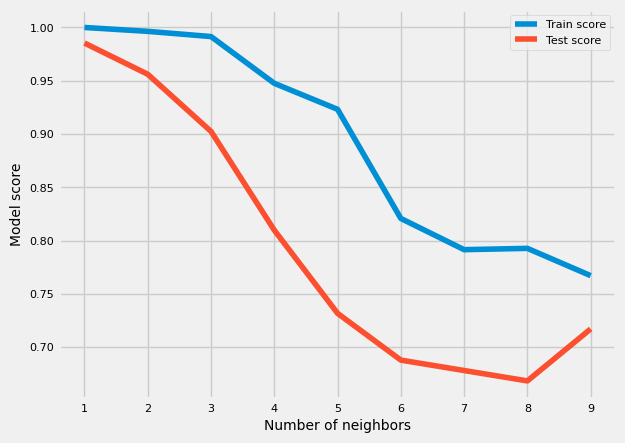

In [33]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 10, 1))

plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

**2.5.2 - Hyperparameter tuning with RandomizedSearchCV**

Lets explore the `RandomForestClassifier` model.

In [34]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid for RandomizedSearchCV
param_values = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
                "max_depth": [None, 5, 10, 20, 30],
                "max_features": ["sqrt", "log2", None],
                "min_samples_split": [2, 4, 6, 8],
                "min_samples_leaf": [1, 2, 4, 8]}

rfc = RandomForestClassifier()
n_iter=5
rfc = RandomizedSearchCV(estimator=rfc,
                            param_distributions=param_values,
                            n_iter=n_iter,                          # how many models to try
                            cv=5,                                   # 5-fold cross-validation
                            verbose=2)
# Fit the RandomizedSearchCV version of clf (does cross-validation for us, so no need to use a validation set)
rfc.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   2.4s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   2.2s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; tota

**2.5.2 - Hyperparameter tuning with GridSearchCV**

Lets explore the `LogisticRegression` model:

In [35]:

from sklearn.model_selection import GridSearchCV

# Different hyperparameters for our LogisticRegression model
log_params = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_lr = GridSearchCV(LogisticRegression(),
                          param_grid=log_params,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_lr.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


**2.5.2.1 - Check the best parameters values**

The best model has the following parameters' values:

In [ ]:
gs_lr.best_params_

**2.5.2.2 - Check accuracy**

In [ ]:
gs_lr.score(X_test, y_test)

**2.5.2.3 - Evaluating**

Evaluting our tuned machine learning classifier, beyond accuracy:
\

- ROC curve and AUC score
- Classification report
- Precision
- Recall
- F1-score

**Predicting**

In [ ]:
y_preds_gs_lr = gs_lr.predict(X_test)
y_preds_gs_lr

**ROC-Curve and AUC score**

In [ ]:
# we want our plots to appear inside the notebook
%matplotlib inline
#from sklearn.metrics import plot_roc_curve       #deprecated!!!
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(gs_lr, X_test, y_test)


**2.5.2.4 - Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print(confusion_matrix(y_test, y_preds_gs_lr))

Graphically

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds_gs_lr),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

plot_conf_mat(y_test, y_preds_gs_lr)

**2.5.2.5 - Classification Report**

In [ ]:
print(classification_report(y_test, y_preds_gs_lr))

**2.5.2.6 - New instance of the "best" LogisticRegression model:**

In [ ]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

*Prediction without cross-validation*

In [ ]:
clf.fit(X_train,y_train)
y_preds_bestmodel = clf.predict(X_test)
y_preds_bestmodel

In [ ]:
print(classification_report(y_test, y_preds_bestmodel))

**Accuracy**

In [ ]:
from sklearn.model_selection import  cross_val_score
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

In [ ]:
cv_acc = np.mean(cv_acc)
cv_acc

**Precision**

In [ ]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

**Recall**

In [ ]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

**F1-score**

In [ ]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

**See all Performance Metrics:**

In [ ]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

**2.5.2.7 - Features relevance for this LogisticRegression model**

the model variable `coef` gives an array of weights estimated by linear regression, i.e., the coefficient of the features in the decision function.
\
`coef_` corresponds to outcome 1 (True) and `-coef_` corresponds to outcome 0 (False).

In [ ]:
clf.coef_

In [ ]:
data.head()

In [ ]:
# Match coef's of features to columns
feature_dict = dict(zip(data.columns, list(clf.coef_[0])))
feature_dict

In [ ]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

## 3 - Make a pipeline

The pipeline is built with a list of (key, value) pairs. The key is a string containing the name you want to give and the value is the estimator object.

```
class sklearn.pipeline.Pipeline(steps, *, memory=None, verbose=False)
```
where `steps`are the list of **(name of step, estimator)** tuples that are to be chained in sequential order. To be compatible with the scikit-learn API, all steps must define `fit`. All non-last steps must also define `transform`.

Very simple example code to show how to use was used in previous
 dummy example:

```
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
```




### 3.1 - Basic pipeline

Lets create a very basic pipeline with the following sequence:

- **Scaler**: For pre-processing data, i.e., transform the data to zero mean and unit variance using the StandardScaler().
- **Feature selector**: Use* VarianceThreshold()* for discarding features whose variance is less than a certain defined threshold.
- **Classifier**: *KNeighborsClassifier()*, which implements the k-nearest neighbor classifier and selects the class of the majority k points, which are closest to the test example.

In [36]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import VarianceThreshold # Feature selector


pipe = Pipeline([
#('scaler', StandardScaler()),
('sca', StandardScaler()),          #the key value is arbitrary
('selector', VarianceThreshold()),
('classifier', KNeighborsClassifier())
#('classifier', RandonForestClassifier())
#('classifier', LogisticRegression())
])
#The pipe object is simple to understand. It says, scale first, select features second and classify in the end

In [37]:
pipe

Pipeline(steps=[('sca', StandardScaler()), ('selector', VarianceThreshold()),
                ('classifier', KNeighborsClassifier())])

In [38]:
#the pipe behaves like a model..thus it must be trained!
pipe.fit(X_train, y_train)

print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))

Training set score: 0.948780487804878
Test set score: 0.8341463414634146


### 3.2 - Optimizing and Tuning the Pipeline

Optimizing means select different solvers, parameters, etc. For instance:

- Searching for other scalers. Instead of just the StandardScaler(), - we can try MinMaxScaler(), Normalizer() and MaxAbsScaler().
- Searching for the best variance threshold to use in the selector, i.e., VarianceThreshold().
- Searching for the best value of k for the KNeighborsClassifier().

In [39]:
# Various pre-processing steps
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder

parameters = {'sca': [StandardScaler(), MinMaxScaler(),     #'scaler': [StandardScaler(), MinMaxScaler(),
 Normalizer(), MaxAbsScaler()],
 'selector__threshold': [0, 0.001, 0.01],
 'classifier__n_neighbors': [1, 3, 5, 7, 10],
 'classifier__p': [1, 2],
 'classifier__leaf_size': [1, 5, 10, 15]
}


In [40]:
parameters

{'sca': [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],
 'selector__threshold': [0, 0.001, 0.01],
 'classifier__n_neighbors': [1, 3, 5, 7, 10],
 'classifier__p': [1, 2],
 'classifier__leaf_size': [1, 5, 10, 15]}

Apply these new parameters to the pipe "model"

In [41]:
grid = GridSearchCV(pipe, parameters, cv=2)
grid.fit(X_train, y_train)
#Don’t worry too much about the warning that you get by running the code above.
#It is generated because we have very few training samples and the cross-validation object does not
#have enough samples for a class for one of its folds.

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
80 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", line 654, in fit
    Xt = self._fit(X, y, routed_params, 

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('sca', StandardScaler()),
                                       ('selector', VarianceThreshold()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__leaf_size': [1, 5, 10, 15],
                         'classifier__n_neighbors': [1, 3, 5, 7, 10],
                         'classifier__p': [1, 2],
                         'sca': [StandardScaler(), MinMaxScaler(), Normalizer(),
                                 MaxAbsScaler()],
                         'selector__threshold': [0, 0.001, 0.01]})

In [42]:
print('Training set score: ' + str(grid.score(X_train, y_train)))
print('Test set score: ' + str(grid.score(X_test, y_test)))

Training set score: 1.0
Test set score: 0.9853658536585366


In [43]:
...
# Access the best set of parameters
best_params = grid.best_params_
print(best_params)
# Stores the optimum model in best_pipe
best_pipe = grid.best_estimator_
print(best_pipe)

{'classifier__leaf_size': 1, 'classifier__n_neighbors': 1, 'classifier__p': 1, 'sca': MaxAbsScaler(), 'selector__threshold': 0}
Pipeline(steps=[('sca', MaxAbsScaler()),
                ('selector', VarianceThreshold(threshold=0)),
                ('classifier',
                 KNeighborsClassifier(leaf_size=1, n_neighbors=1, p=1))])


Another way to analyse the pipe result

In [44]:
grid.cv_results_
#Attention: to much data!!!

{'mean_fit_time': array([0.00648892, 0.00642574, 0.00652957, 0.00627136, 0.00627732,
        0.00641084, 0.00613391, 0.00538623, 0.00410056, 0.00601149,
        0.00634909, 0.00615668, 0.00692081, 0.00615442, 0.00676727,
        0.00610888, 0.00926411, 0.00606537, 0.00605619, 0.0056808 ,
        0.00392556, 0.00592458, 0.00596225, 0.00576782, 0.00740719,
        0.00642049, 0.00633907, 0.00605381, 0.00581312, 0.00660908,
        0.00635362, 0.00628102, 0.00391805, 0.00568998, 0.00571597,
        0.00576687, 0.00609767, 0.0061754 , 0.00602174, 0.00643468,
        0.00595129, 0.00773752, 0.00628555, 0.00550342, 0.00418913,
        0.00668883, 0.007743  , 0.005988  , 0.00608671, 0.00661862,
        0.00599504, 0.00636983, 0.00592339, 0.00598216, 0.0060097 ,
        0.00617909, 0.00393581, 0.00573313, 0.00674164, 0.00585651,
        0.00607359, 0.00617909, 0.00623572, 0.00619388, 0.0061034 ,
        0.00588453, 0.00733125, 0.00553119, 0.00383723, 0.00591946,
        0.00586724, 0.00582314,

In [45]:
result_df = pd.DataFrame.from_dict(grid.cv_results_, orient='columns')
print(result_df.columns)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__leaf_size', 'param_classifier__n_neighbors',
       'param_classifier__p', 'param_sca', 'param_selector__threshold',
       'params', 'split0_test_score', 'split1_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


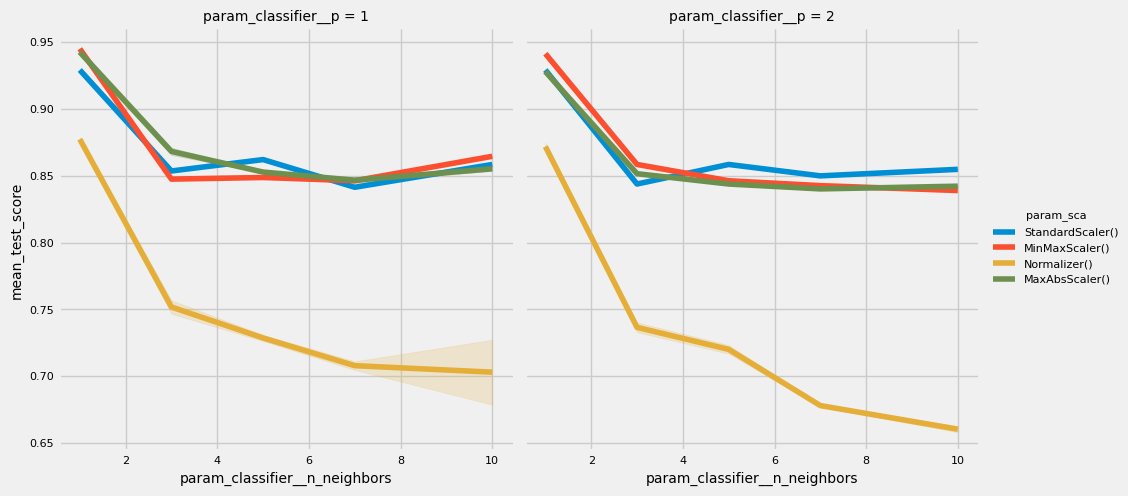

In [46]:

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


sns.relplot(data=result_df,
 kind='line',
 x='param_classifier__n_neighbors',
 y='mean_test_score',
 hue='param_sca',
 col='param_classifier__p')
plt.show()

The plots clearly show that using MinMaxScaler(), with n_neighbors=5 and p=1, gives the best result.

## 4 - Other Pipeline

In [55]:
ds = pd.read_csv(filePath+"car-sales-extended.csv")
ds.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


### Dataset insights

*Data types*

In [56]:
ds.dtypes

,0
Make,object
Colour,object
Odometer (KM),int64
Doors,int64
Price,int64


`Make` and `Colour` are Categorical features!

*Null Values*

In [57]:
ds.isna().sum()

,0
Make,0
Colour,0
Odometer (KM),0
Doors,0
Price,0


Lets work on ther dataset, trying to:
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

For that we'll use a pipeline!

In [58]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [59]:
# Import modell and auxiliary processes
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

### Pipeline for data preparation

In [60]:
# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop the rows with missing labels
ds.dropna(subset=["Price"], inplace=True)

To impute different features with different arbitrary values, it is needed to set up several *SimpleImputer* steps within a pipeline and then join them with the *ColumnTransformer*.

In [61]:
# Define different features and transformer pipelines
# The SimpleImputer class provides basic strategies for imputing "missing values".
# Missing values can be imputed with a provided constant value, or using the statistics
# (mean, median or most frequent) of each column in which the missing values are located.
# see https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
# When strategy == “constant”, fill_value is used to replace all occurrences of missing_values.
# For string or object data types, fill_value must be a string.
# If None, fill_value will be 0 when imputing numerical data and “missing_value” for strings or object data types.
# strategy: “mean”, “median”, “most_frequent”, or “constant”.

categorical_features = ["Make", "Colour"]

# this imputer imputes categorical features with "an arbitrary value"
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),# missing values are replaced by "missing"
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])                  # categorical convert in numerical



In [62]:
door_feature = ["Doors"]
# this imputer imputes categorical features with 4
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

In [63]:

numeric_features = ["Odometer (KM)"]
# this imputer imputes numerics missing values with the mean
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

In [65]:
# then we put the features list and the transformers together
# using the "ColumnTransformer"

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_features)])

### Pipeline for model creation

Using `make_pipeline`

In [66]:
#Example:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
a=make_pipeline(StandardScaler(), GaussianNB(priors=None))
# or

In [67]:

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),("model", RandomForestRegressor(n_jobs=-1))])

#equivalente a
#model = make_pipeline(preprocessor,RandomForestRegressor(n_jobs=-1))

In [68]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Make', 'Colour']),
                                                 ('door',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=4,
                                                                                 strategy='constant'))]),
                                                  ['Doors']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Odometer (KM)'])])),
                ('model', RandomForestRegressor(n_jobs=-1))])

The pipeline combines a series of data preprocessing steps (filling missing values, encoding numerical values) as well as a model!

In [69]:
#Or
#numerical_imputer = SimpleImputer(strategy = "mean")
#categorical_imputer = SimpleImputer(strategy="constant" , fill_value = "missing")
#door_imputer = SimpleImputer(strategy = "constant" , fill_value = 4)
#transformer = ColumnTransformer([
#    ("categorical_imputer" , categorical_imputer , categorical_features),
#    ("numerical_imputer" , numerical_imputer , numeric_features),
#    ("door_imputer" , door_imputer , door_feature),

### Training

In [70]:
#Training
# Split data
X1 = ds.drop("Price", axis=1)
y1 = ds["Price"]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)

# Fit and score the model
model.fit(X1_train, y1_train)
scorePipe=model.score(X1_test, y1_test)
scorePipe

0.3187859776018187

Predicting

In [71]:
y1_preds = model.predict(X1_test)
y1_preds.shape, y1_test.shape

((200,), (200,))

### Model improvement with pipeline

Lets integrate `GridSearchCV` in the `Pipeline`.

When creating a hyperparameter grid, it is necessary to add a prefix to each hyperparameter (see the [documentation for `RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) for a full list of possible hyperparameters to tune).

The prefix is the name of the `Pipeline` intended to  alter, followed by two underscores.

For example, to adjust `n_estimators` of `"model"` in the `Pipeline`, you'd use: `"model__n_estimators"` (note the double underscore after `model__` at the start).

In [ ]:
# Using grid search with pipeline
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"], # note the double underscore after each prefix "preprocessor__"
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["sqrt"],
    "model__min_samples_split": [2, 4]
}
gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)  #model is the pipeline!
gs_model.fit(X1_train, y1_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

In [ ]:
# Score the best model
gsScore=gs_model.score(X1_test, y1_test)



In [ ]:
y_predPipe = gs_model.predict(X1_test)
y_predPipe

Comparing models

In [ ]:
df = pd.DataFrame({"Baseline Pipe":scorePipe,
                   "GridSearchCV Pipe":gsScore}, index=[0])
df.plot.bar(figsize=(6, 5));

In [ ]:
gsPipeMetrics=evaluate_preds(y1_test, y_predPipe)

Comparing Performances

In [ ]:
final = pd.DataFrame({"GridSearchCVPipe":gsPipeMetrics})

## 5 - Example of Pipeline for Data preparation

[See "Column Transformer with Mixed Types"](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html#sphx-glr-auto-examples-compose-plot-column-transformer-mixed-types-py)

## 6 - Pipelines with tools

* [GitHub Actions](https://neptune.ai/blog/build-mlops-pipelines-with-github-actions-guide)

* [Kedro](https://neptune.ai/blog/data-science-pipelines-with-kedro)

* [Metaflow](https://metaflow.org/)

* [TensorFlow](https://www.tensorflow.org/?hl=pt)

* Others


Explore!

## 7 - Using ML Models in others applications

* [Using C# to run Python Scripts with Machine Learning Models](https://ernest-bonat.medium.com/using-c-to-run-python-scripts-with-machine-learning-models-a82cff74b027)
* [Machine Learning: Models to Production](https://towardsdatascience.com/how-to-prepare-scikit-learn-models-for-production-4aeb83161bc2)

## References


* [Python Data Science Handbookk](https://jakevdp.github.io/PythonDataScienceHandbook/)

* [Handling Missing Data with SimpleImputer](https://www.analyticsvidhya.com/blog/2022/10/handling-missing-data-with-simpleimputer/)

* [How to use Sklearn to impute missing values](https://www.educative.io/answers/how-to-use-sklearn-to-impute-missing-values)

In [ ]:
#!End